/var/folders/6n/d7w5hsgd71j1__mrznd773k00000gn/T/ipykernel_37987/1320001493.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Inflation'].fillna(0, inplace=True)


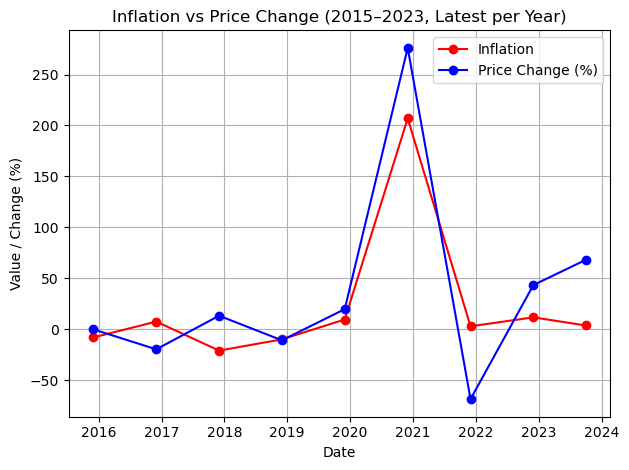

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("WLD_RTFP_country_2023-10-02.csv")
df['Inflation'].fillna(0, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <= 2023)]
latest_per_year = (df_filtered.sort_values('date').groupby(df_filtered['date'].dt.year, as_index=False).last())
latest_per_year['Price_Change'] = latest_per_year['High'].pct_change() * 100
latest_per_year.fillna(0, inplace=True)

plt.figure()
plt.plot(latest_per_year['date'], latest_per_year['Inflation'], label='Inflation', color='red', marker='o')
plt.plot(latest_per_year['date'], latest_per_year['Price_Change'], label='Price Change (%)', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Value / Change (%)')
plt.title('Inflation vs Price Change (2015–2023, Latest per Year)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()